In [40]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import torch as tc

from p_power import *

In [41]:
# y = tc.complex(tc.Tensor([[1, 0, 1, 0], [0, 1, 0, 1]]), tc.zeros(2, 4)).T
y = tc.complex(
        *[tc.normal(mean=tc.zeros((100,100)), std=1) for _ in range(2)]
    ).to(device)

In [42]:
p_power(y, 2)

(tensor([[[[27.4900]]]]),
 tensor([[[[-0.1414+0.1282j],
           [-0.2015-0.0374j],
           [-0.0365+0.0051j],
           [ 0.0498-0.0052j],
           [ 0.0046+0.1502j],
           [-0.0454-0.0110j],
           [ 0.0571-0.0045j],
           [-0.1987+0.0933j],
           [-0.0480-0.0449j],
           [ 0.0659-0.0360j],
           [-0.0255-0.0765j],
           [ 0.0296+0.0545j],
           [-0.0314-0.0931j],
           [-0.1044+0.0447j],
           [ 0.0227-0.1351j],
           [-0.0818-0.0759j],
           [ 0.0402+0.0215j],
           [-0.0741+0.0274j],
           [ 0.0510-0.1009j],
           [-0.0340-0.1092j],
           [-0.0627-0.0983j],
           [-0.0547+0.1086j],
           [ 0.0842-0.0479j],
           [-0.0229+0.0277j],
           [-0.0365-0.0037j],
           [-0.0471-0.0563j],
           [ 0.0623-0.0997j],
           [-0.0465+0.0246j],
           [-0.1373+0.0380j],
           [ 0.0385-0.0229j],
           [-0.0117+0.0891j],
           [ 0.0213+0.0717j],
           [ 0

In [43]:
tc.linalg.matrix_norm(y, ord=2)

tensor(27.4900)

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:25<00:00,  1.55it/s]
C:\Users\jackr\AppData\Local\Temp\ipykernel_24688\1917097199.py:5: RuntimeWarning: divide by zero encountered in divide
  qs = 1 - 1 / (1 - ps)


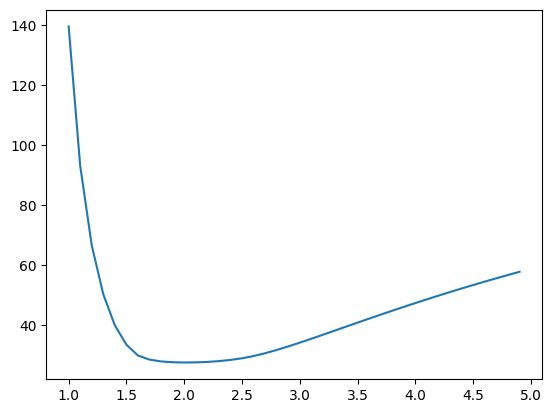

In [44]:
ps = np.arange(1, 5, 0.1)
norms = [p_power(y, p, s_max=1000)[0] for p in tqdm(ps)]
norms = [n if n==0 else n.item() for n in norms]
plt.plot(ps, norms)
qs = 1 - 1 / (1 - ps)
# plt.plot(ps, np.maximum(2**(1/ps), 2**(1/ps)), linestyle='--', linewidth=2)
plt.show()

In [45]:
ps

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [46]:
norms

[139.42906188964844,
 92.9903335571289,
 66.47254943847656,
 50.16680145263672,
 39.837745666503906,
 33.39891815185547,
 29.79817771911621,
 28.44466209411621,
 27.830913543701172,
 27.566871643066406,
 27.489992141723633,
 27.52718734741211,
 27.673654556274414,
 27.952512741088867,
 28.346111297607422,
 28.88813591003418,
 29.63772964477539,
 30.578920364379883,
 31.66355323791504,
 32.85033416748047,
 34.10777282714844,
 35.41085433959961,
 36.742332458496094,
 38.08729553222656,
 39.435882568359375,
 40.78084945678711,
 42.116737365722656,
 43.43949508666992,
 44.74606704711914,
 46.0341682434082,
 47.302146911621094,
 48.5488166809082,
 49.7733268737793,
 50.97514724731445,
 52.153953552246094,
 53.30963134765625,
 54.44218444824219,
 55.55172348022461,
 56.63848876953125,
 57.702735900878906]

In [47]:
tc.linalg.matrix_norm(y, ord=2)

tensor(27.4900)

In [48]:
dual(y, p=2, dim=1)**2

tensor([[-2.3638e-02+6.3190e-03j,  3.1668e-03-8.1294e-04j,
         -1.4221e-03-3.3493e-03j,  ...,
         -4.3735e-05-4.6592e-05j, -5.0642e-03+3.7138e-03j,
         -1.6586e-02-6.0806e-03j],
        [-2.0381e-04+1.6986e-04j, -1.4659e-02+2.0038e-02j,
          1.9636e-04+4.4459e-03j,  ...,
         -1.3794e-03+3.7999e-03j, -2.9546e-03+1.3542e-03j,
         -1.3987e-02+2.8516e-02j],
        [-1.8128e-03-1.1070e-02j, -8.6571e-03-3.1685e-03j,
          3.1071e-03+1.9178e-03j,  ...,
         -1.4699e-03+5.0073e-03j,  1.3595e-02-3.1532e-03j,
         -3.3260e-03+5.0183e-03j],
        ...,
        [ 1.0012e-03+1.2723e-03j, -1.3375e-03-1.9326e-03j,
         -1.9784e-03+1.4977e-03j,  ...,
         -7.0354e-03+3.4385e-03j,  2.0415e-03-4.3114e-03j,
          8.4002e-03-3.2736e-03j],
        [ 7.9606e-03-6.4678e-03j,  8.1465e-04+1.8143e-03j,
         -9.8902e-04-3.5106e-04j,  ...,
          1.5664e-02-1.0137e-01j,  7.0587e-03-2.1119e-03j,
          1.0086e-03+7.9496e-04j],
        [ 1.9246e-04+6

In [49]:
range(2)

range(0, 2)

In [50]:
dim=1
val, ind = y.abs().max(dim=dim, keepdim=True)
range_shape = [1 for _ in range(len(y.shape))]
range_shape[dim] = -1
y_dual = 0 * y
y_dual[tc.arange(y.shape[dim]).reshape(range_shape) == ind] = val.sgn().flatten()
#y_dual[tc.arange(y.shape[dim]).reshape(range_shape) == ind] = tc.sgn(val)

RuntimeError: Index put requires the source and destination dtypes match, got ComplexFloat for the destination and Float for the source.

In [ ]:
y_dual

tensor([[0., 0., 1.],
        [1., -0., -0.]])